# Movements of a planetary system with N bodies

We will discribe the motion of different planets of a planetary system.

In [25]:
import ROOT
import numpy as np
import time
import math
from math import exp
import matplotlib.pyplot as plt
from numpy import loadtxt
from random import choices
import random
from scipy import optimize
from scipy.optimize import fmin
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [120]:
#Starting values
Number_Planets = 4
Time_duration = 30
Time_steps = 1
G = 0.1

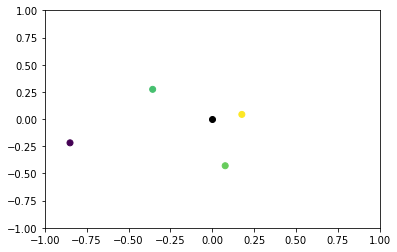

In [121]:
#Create random positions of Planets
Radii_planets = np.random.uniform(0.1,1,size=(Number_Planets))
Angle_planets = np.random.uniform(0,2*np.pi,size=(Number_Planets))
X_Pos_planets = Radii_planets * np.cos(Angle_planets)
Y_Pos_planets = Radii_planets * np.sin(Angle_planets)
Pos_array = np.vstack((X_Pos_planets, Y_Pos_planets)).T #planets
Pos_array = np.append(Pos_array,[[0,0]],0) #sun
#print(Pos_array)



#Create random start velocities of Planets
X_Vel_planets = np.random.uniform(0,0.1,size=(Number_Planets))
Y_Vel_planets = np.random.uniform(0,0.1,size=(Number_Planets))
Vel_array = np.vstack((X_Vel_planets, Y_Vel_planets)).T  #plantes
Vel_array = np.append(Vel_array,[[0,0]],0) #sun
#print(Vel_array)



#Get random Masses smaller than sun mass
Mass_array = np.append(np.random.uniform(0,1,size=(Number_Planets)),1)
#print(Mass_array)



#plot planet positions
plt.scatter(0,0,color ='black')
plt.scatter(X_Pos_planets,Y_Pos_planets,c=Mass)
plt.xlim(-1, 1);
plt.ylim(-1, 1);

## Main body - Dpoing the calculation

### Function calculating the different acc

In [122]:
def Get_Acc(Pos_Array,Mass_Array):
    x = Pos_array[:,0:1]
    y = Pos_array[:,1:2]
    dx = x.T - x
    dy = y.T - y
    Diag = np.diag([1]*(Number_Planets+1))
    inv_r2 = (dx**2 + dy**2 + Diag)**(-1.5)- Diag
    ax = G * (dx * inv_r2) @ Mass_array
    ay = G * (dy * inv_r2) @ Mass_array
    a = np.vstack((ax, ay)).T
    return(a)

### Main Main body

In [133]:
timestep_array = np.arange(round(Time_duration/Time_steps))
print(timestep_array)
Array_of_all_pos = [Pos_array]
for i in timestep_array:
    #acceleration
    Acc_array = Get_Acc(Pos_array,Mass_array)
    #velocities
    Vel_array = Vel_array + (Time_steps/2) * Acc_array
    #Positions 
    Pos_array = Pos_array + Vel_array * Time_steps
    Array_of_all_pos.append(Pos_array)
print(Array_of_all_pos)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[array([[  39.58453984,   19.69744661],
       [  26.68763311,    8.5369732 ],
       [-127.76895948,  -29.50726203],
       [  34.80470062,    8.38483818],
       [  35.19684049,    8.33775582]]), array([[  39.99909036,   19.85950197],
       [  27.03733676,    8.63041301],
       [-129.11459555,  -29.81803545],
       [  35.37587702,    8.12383041],
       [  35.55051439,    8.45092021]]), array([[  40.41350466,   20.02122115],
       [  27.38778342,    8.72384126],
       [-130.46022961,  -30.1288084 ],
       [  36.1183052 ,    8.18365183],
       [  35.89284486,    8.54291537]]), array([[  40.82778408,   20.18260891],
       [  27.7389702 ,    8.81725794],
       [-131.80586172,  -30.43958089],
       [  36.71296791,    8.47890228],
       [  36.2449001 ,    8.61938094]]), array([[  41.24193001,   20.34366989],
       [  28.09089462,    8.91066275],
       [-133.1514919 ,  -30.75035292],
 

In [130]:
Get_Acc(Pos_array,Mass_array)

array([[-6.41240534e-04, -2.75271550e-03],
       [ 3.25030945e-03,  7.50220274e-05],
       [ 3.02213761e-05,  7.11740020e-06],
       [-3.00668285e-01,  5.45108213e-01],
       [ 1.97043603e-02, -3.58576367e-02]])

In [124]:
Array_of_all_pos

[array([[ 0.07749412, -0.4290993 ],
        [-0.84950321, -0.21832674],
        [ 0.17693338,  0.04294233],
        [-0.3558338 ,  0.2735762 ],
        [ 0.        ,  0.        ]]),
 array([[ 0.06389193, -0.08224086],
        [-0.72997122, -0.13733633],
        [-1.21274925, -0.27885656],
        [-0.03196939,  0.11852355],
        [ 0.4185758 ,  0.10017191]])]

In [119]:
Tic = time.time()
x = Pos_array[:,0:1]
y = Pos_array[:,1:2]
dx = x.T - x
dy = y.T - y
Diag = np.diag([1]*(Number_Planets+1))
inv_r2 = (dx**2 + dy**2 + Diag)**(-1.5)- Diag
ax = G * (dx * inv_r2) @ Mass_array
ay = G * (dy * inv_r2) @ Mass_array
print(ax)
Toc = time.time()
print("time : %s s" % (Toc-Tic))

[-0.06493748  1.13928775  0.61125492 -1.36025239  0.39375566]
time : 0.001077413558959961 s


In [114]:
print(dx)
print(inv_r2)
print(dx * inv_r2)
print(dx[0][1]*inv_r2[0][1])



[[ 0.         -0.63981563 -0.16636754 -0.2601395  -0.45955256]
 [ 0.63981563  0.          0.47344809  0.37967613  0.18026307]
 [ 0.16636754 -0.47344809  0.         -0.09377197 -0.29318502]
 [ 0.2601395  -0.37967613  0.09377197  0.         -0.19941305]
 [ 0.45955256 -0.18026307  0.29318502  0.19941305  0.        ]]
[[ 0.          2.91010725  3.95489946 53.87259169  9.85745844]
 [ 2.91010725  0.          5.27963163  7.72300434 48.9646138 ]
 [ 3.95489946  5.27963163  0.          3.3846606   4.49016765]
 [53.87259169  7.72300434  3.3846606   0.         74.71204567]
 [ 9.85745844 48.9646138   4.49016765 74.71204567  0.        ]]
[[  0.          -1.86193211  -0.65796689 -14.01438929  -4.53002024]
 [  1.86193211   0.           2.49963153   2.93224039   8.82651184]
 [  0.65796689  -2.49963153   0.          -0.31738628  -1.31644989]
 [ 14.01438929  -2.93224039   0.31738628   0.         -14.89855714]
 [  4.53002024  -8.82651184   1.31644989  14.89855714   0.        ]]
-1.8619321103955397
0.0
-0.

/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(
MovieWriter imagemagick unavailable; using Pillow instead.


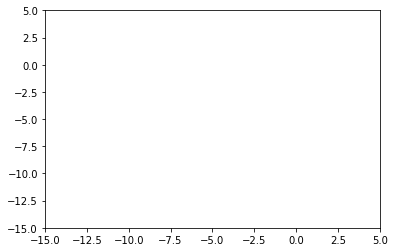

In [136]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def neighbors(point):
    x, y = point
    for i, j in itertools.product(range(-1, 2), repeat=2):
        if any((i, j)):
            yield (x + i, y + j)

def advance(board):
    newstate = set()
    recalc = board | set(itertools.chain(*map(neighbors, board)))

    for point in recalc:
        count = sum((neigh in board)
                for neigh in neighbors(point))
        if count == 3 or (count == 2 and point in board):
            newstate.add(point)

    return newstate

glider = set([(0, 0), (1, 0), (2, 0), (0, 1), (1, 2)])

fig, ax = plt.subplots()

x, y = zip(*glider)
mat, = ax.plot(x, y, 'o')

def animate(i):
    global glider
    glider = advance(glider)
    x, y = zip(*glider)
    mat.set_data(x, y)
    return mat,

ax.axis([-15,5,-15,5])
ani = animation.FuncAnimation(fig, animate, interval=50)
ani.save("output.gif" ,writer="imagemagick")
plt.show()